## Q1: Logit Model for Credit Grant Outcome use case


A group of 20 customers possess portfolio ranging from 0.5 to 6.5 million USD in one of the largest Financial Services majors in South America. As an analyst you are tasked to find out how the portfolio amount affect the probability of a customer getting a credit grant? Please refer to the dataset provided in GitHub - CreditGrantOutcome.csv. 

Portfolio Value is given in million USD = X; And Credit Grant Decision = y which is either 0 or 1, i.e. 1 for getting a grant. 

 - a) Find out the Odds ratio for every customer data that is captured here. What is the Odds ratio when Portfolio Value X = 2 m USD? 
 - b) Find out optimum values of coefficients beta_0 and beta_1?

import pandas as pd

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats


In [3]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

In [6]:
df_cg = pd.read_csv('CreditGrantOutcome.csv')
df_cg.head()

,PortfolioValue,CreditGrantDecision
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0


In [7]:
df_cg.columns = ['portfolio_value','credit_grant_decision']
df_cg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   portfolio_value        20 non-null     float64
 1   credit_grant_decision  20 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 448.0 bytes


In [8]:
df_cg.credit_grant_decision.unique()

array([0, 1], dtype=int64)

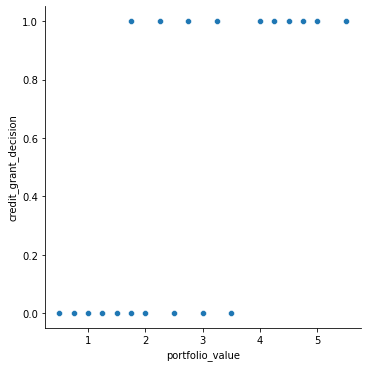

In [11]:
sns.relplot(y = 'credit_grant_decision', x = 'portfolio_value', data = df_cg )

#### We can apply Binary Logistic Regression. 

#### Checking the model assumptions

#### Assumption 1. - Linear relationship between the predictor and outcome - Confirming via visualization

<AxesSubplot:xlabel='portfolio_value'>

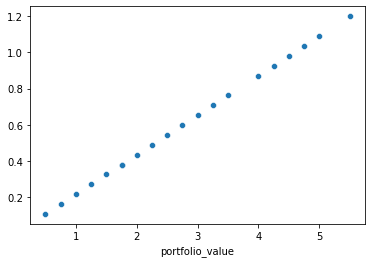

In [15]:
import  numpy as np
Y = df_cg.credit_grant_decision
X = df_cg.portfolio_value

model_cg_lin_check = sm.GLM(Y,X, family = sm.families.Binomial()).fit()

Y_Pred = model_cg_lin_check.predict(X)

log_odds = np.log(Y_Pred/(1-Y_Pred))

sns.scatterplot(x = X, y = log_odds )

#### Assumption 1. - Linear relationship between the predictor and outcome - Confirmed via visual analysis

#### Assumption 1. - Linear relationship between the predictor and outcome - Confirming via Box Tidwell test as well

In [17]:
df_cg_box = df_cg

df_cg_box['x_logx_interaction'] = df_cg['portfolio_value'] * np.log(df_cg['portfolio_value'])

df_cg_box.head()

,portfolio_value,credit_grant_decision,x_logx_interaction
0,0.50,0,-0.346574
1,0.75,0,-0.215762
2,1.00,0,0.000000
3,1.25,0,0.278929
4,1.50,0,0.608198


In [18]:
model_lin_check_box = sm.GLM.from_formula('credit_grant_decision~ portfolio_value + x_logx_interaction', 
                                          family = sm.families.Binomial(), data = df_cg_box).fit()

print(model_lin_check_box.summary())

                   Generalized Linear Model Regression Results                   
Dep. Variable:     credit_grant_decision   No. Observations:                   20
Model:                               GLM   Df Residuals:                       17
Model Family:                   Binomial   Df Model:                            2
Link Function:                     Logit   Scale:                          1.0000
Method:                             IRLS   Log-Likelihood:                -8.0270
Date:                   Sat, 17 Sep 2022   Deviance:                       16.054
Time:                           20:53:23   Pearson chi2:                     14.6
No. Iterations:                        5   Pseudo R-squ. (CS):             0.4421
Covariance Type:               nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Interc

#### Assumption 1. - Linear relationship between the predictor and outcome - Confirmed via Box Tidwell test as well, as the value of the interaction of the predictor and its log is not significant. Thus the assumption of Linearity is not violated

#### Assumption 2. - Independence of observations - Confirmed via the number of unique entries

In [20]:
len(df_cg.index)

20

In [48]:
df_cg.reset_index(drop=True).index.rename('ID', inplace = True)

In [49]:
df_cg.index.rename('ID', inplace = True)

In [65]:
df_cg.reset_index(drop=True)
len(df_cg.ID.unique())

20

#### Assumption 3. - Dichotomous Outcomes - Confirmed

In [69]:
df_cg.credit_grant_decision.unique()

array([0, 1], dtype=int64)

#### Assumption 4. - Absense of strong Multi-collinearity - Since there is only one predictor variable, this assumption does not apply

#### Assumption 5. - Outliers (post model training)

In [72]:
X_const = sm.add_constant(df_cg.portfolio_value)
Y = df_cg.credit_grant_decision

model_glm_cg = sm.GLM(Y,X_const, family = sm.families.Binomial()).fit()

print(model_glm_cg.summary())

                   Generalized Linear Model Regression Results                   
Dep. Variable:     credit_grant_decision   No. Observations:                   20
Model:                               GLM   Df Residuals:                       18
Model Family:                   Binomial   Df Model:                            1
Link Function:                     Logit   Scale:                          1.0000
Method:                             IRLS   Log-Likelihood:                -8.0299
Date:                   Sat, 17 Sep 2022   Deviance:                       16.060
Time:                           21:29:57   Pearson chi2:                     14.6
No. Iterations:                        5   Pseudo R-squ. (CS):             0.4419
Covariance Type:               nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const       

In [75]:
influence = model_glm_cg.get_influence()

print(influence.summary_frame().head())

   dfb_const  dfb_portfolio_value   cooks_d  standard_resid  hat_diag  \
0  -0.054914             0.049816  0.001517       -0.196905  0.072554   
1  -0.071731             0.063771  0.002614       -0.239104  0.083793   
2  -0.091828             0.079555  0.004370       -0.290205  0.094016   
3  -0.114356             0.095736  0.007025       -0.351801  0.101949   
4  -0.137192             0.109516  0.010783       -0.425650  0.106375   

   dffits_internal  
0        -0.055074  
1        -0.072310  
2        -0.093487  
3        -0.118534  
4        -0.146858  


In [82]:
cooks_threshold = 4/len(influence.summary_frame().dfb_portfolio_value)


In [83]:
df_cg['cooks_d'] = influence.summary_frame().cooks_d

df_cg.head()

,ID,portfolio_value,credit_grant_decision,x_logx_interaction,cooks_d
0,0,0.50,0,-0.346574,0.001517
1,1,0.75,0,-0.215762,0.002614
2,2,1.00,0,0.000000,0.004370
3,3,1.25,0,0.278929,0.007025
4,4,1.50,0,0.608198,0.010783


In [85]:
df_cg[df_cg['cooks_d'] > cooks_threshold]

,ID,portfolio_value,credit_grant_decision,x_logx_interaction,cooks_d
6,6,1.75,1,0.979328,0.283440
13,13,3.50,0,4.384670,0.269676


#### Dropping the outliers and retraining the model

In [87]:
df_cg_2 = df_cg[df_cg['cooks_d'] < cooks_threshold]
df_cg_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 19
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     18 non-null     int64  
 1   portfolio_value        18 non-null     float64
 2   credit_grant_decision  18 non-null     int64  
 3   x_logx_interaction     18 non-null     float64
 4   cooks_d                18 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 864.0 bytes


In [91]:
X_const = sm.add_constant(df_cg_2.portfolio_value)
Y = df_cg_2.credit_grant_decision

model_glm_cg_2 = sm.GLM(Y,X_const, family = sm.families.Binomial()).fit()

print(model_glm_cg.summary())

                   Generalized Linear Model Regression Results                   
Dep. Variable:     credit_grant_decision   No. Observations:                   18
Model:                               GLM   Df Residuals:                       16
Model Family:                   Binomial   Df Model:                            1
Link Function:                     Logit   Scale:                          1.0000
Method:                             IRLS   Log-Likelihood:                -4.2859
Date:                   Sat, 17 Sep 2022   Deviance:                       8.5718
Time:                           21:54:55   Pearson chi2:                     7.60
No. Iterations:                        7   Pseudo R-squ. (CS):             0.5975
Covariance Type:               nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const       

In [92]:
model_sm_cg_2 = sm.Logit(Y,X_const).fit()

print(model_sm_cg.summary())

Optimization terminated successfully.
         Current function value: 0.238105
         Iterations 8
                             Logit Regression Results                            
Dep. Variable:     credit_grant_decision   No. Observations:                   18
Model:                             Logit   Df Residuals:                       16
Method:                              MLE   Df Model:                            1
Date:                   Sat, 17 Sep 2022   Pseudo R-squ.:                  0.6565
Time:                           21:54:55   Log-Likelihood:                -4.2859
converged:                          True   LL-Null:                       -12.477
Covariance Type:               nonrobust   LLR p-value:                 5.179e-05
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -7.2601      3.767     -1.927      0.054     -14.644   

#### Model Diagnostics - dropping the outliers increased the p value of the predictor, hence the outliers shouldn't be dropped. Staying with the original model. Low P value of LL ratio suggests an overall model significance

In [93]:
X_const = sm.add_constant(df_cg.portfolio_value)
Y = df_cg.credit_grant_decision

model_sm_cg_1 = sm.Logit(Y,X_const).fit()

print(model_sm_cg_1.summary())

Optimization terminated successfully.
         Current function value: 0.401494
         Iterations 7
                             Logit Regression Results                            
Dep. Variable:     credit_grant_decision   No. Observations:                   20
Model:                             Logit   Df Residuals:                       18
Method:                              MLE   Df Model:                            1
Date:                   Sat, 17 Sep 2022   Pseudo R-squ.:                  0.4208
Time:                           21:55:59   Log-Likelihood:                -8.0299
converged:                          True   LL-Null:                       -13.863
Covariance Type:               nonrobust   LLR p-value:                 0.0006365
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -4.0777      1.761     -2.316      0.021      -7.529   

In [106]:
#Checking the model accuracy

from sklearn.metrics import classification_report

Y_Prob = model_sm_cg_1.predict(X_const)
Y_Pred = model_sm_cg_1.predict(X_const)
Y_Pred[Y_Pred > 0.5] = 1
Y_Pred[Y_Pred < 0.5] = 0
Y_Test = df_cg.credit_grant_decision  

print(classification_report(Y_Test,Y_Pred))


              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.80      0.80      0.80        10

    accuracy                           0.80        20
   macro avg       0.80      0.80      0.80        20
weighted avg       0.80      0.80      0.80        20



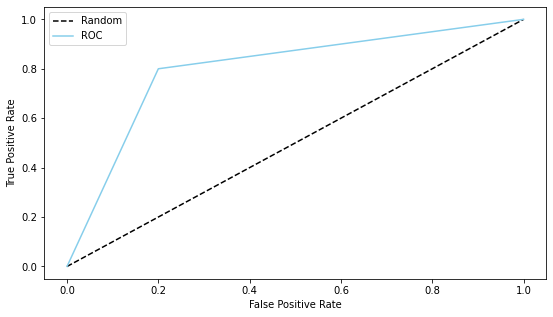

In [110]:
#Plotting the RoC curve:
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(Y_Test,Y_Pred)

plt.figure(figsize=(9,5))
plt.plot([0,1], [0,1], 'k--', label = 'Random')
plt.plot(fpr,tpr,color = 'skyblue', label = 'ROC')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(fontsize=10, loc='best')
plt.show()

### With an Accuracy of 80%, and recall of 80%, we can consider this model to be a good fit. The outliers can be dropped but that would lead to violation of the first basic assumption of the predictor being non-zero. 

### Ans 2.a - Customer Data odds ratio

In [112]:
df_odds = pd.DataFrame()

df_odds['Y_Prob'] = Y_Prob
df_odds['Y_Odds'] = df_odds['Y_Prob'].apply(lambda x : x/(1-x))

print(df_odds.head())

     Y_Prob    Y_Odds
0  0.034710  0.035958
1  0.049773  0.052380
2  0.070892  0.076301
3  0.100029  0.111146
4  0.139344  0.161905


#### Ans 1.a The odds for the customer data are mentioned below 

In [124]:
df_cg['Y_Odds'] = df_odds['Y_Odds'] 

print(df_cg[[ 'Y_Odds']])

       Y_Odds
0    0.035958
1    0.052380
2    0.076301
3    0.111146
4    0.161905
5    0.235844
6    0.235844
7    0.343550
8    0.500443
9    0.728987
10   1.061902
11   1.546853
12   2.253274
13   3.282304
14   6.964796
15  10.145494
16  14.778760
17  21.527956
18  31.359389
19  66.542206


In [131]:
df_cg[df_cg['portfolio_value'] == 2]['Y_Odds']

7    0.34355
Name: Y_Odds, dtype: float64

#### Ans 2.a The odds ratio for the customer whose portfolio value is 2 M is 0.3455

#### Ans 2.b The optimal values of the coefficients are given below :

In [133]:
model_sm_cg_1.params

const             -4.077713
portfolio_value    1.504645
dtype: float64

## Q2: Confusion Matrix Scenario

You are working on a binary classification model to predict which devices are going to fail or not fail in the future. What is the accuracy of your model given the confusion matrix below? (Rounded to 1 place after decimal)

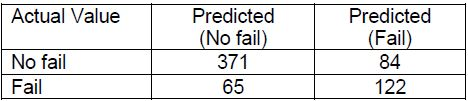

In [1]:
# We can utilize the accuracy formula for a confusion matrix
# Considering no fail as the positive event and fail as the negative event
tp = 371
tn = 122

fp = 65
fn = 84

accuracy = (tp + tn) / (tp + tn + fp + fn)

print('The accuracy of the device failure classification model is', round(accuracy,1))

The accuracy of the device failure classification model is 0.8


## Q3: Logit/GLM Model for Insurance Cross Sell use case

The insurance major is interested to understand the cross-sell opportunities by analysing the information it has. As a Data Scientist, you have access to the Insurance Cross Sell data. (Please refer to GitHub -InsuranceCrossSell.csv). 

The description of variables are as follows (for your reference): 
- Response is the binary outcome which indicates whether customer has taken the insurance or not. 1 if insurance taken Else 0. 

- Other predictor variables are as follows: Gender, Age, Driving_License, Region_Code etc. 
    - Gender of customer o Age of customer o Driving_License (DL) – 1 if customer has DL, else 0 
    - Region_Code – location code to which customer belongs 
    - Previously_Insured – 1 if customer has prior insurance

    - Vehicle_Age – 3 categories: <1 year, 1-2 year, >2 years 
    - Vehicle_Damage – whether there has been damage to the vehicle owned by the customer or not. 1 if there is damage in the past. 
    - Annual_Premium – amount paid by customer 
    - Policy_Sales_Channel – code of the channel through which the policy is being sold 
    - Vintage – number of days customer is associated with the insurance


Fit a model (using Logit or GLM) and explain significance of predictors on the "Response" decision.

In [4]:
df_ins = pd.read_csv('InsuranceCrossSell.csv')

In [5]:
df_ins.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [6]:
df_ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [10]:
col_list = list(df_ins.columns)

col_list = [x.lower() for x in col_list]

col_list

df_ins.columns = col_list

In [16]:
df2 = pd.get_dummies(df_ins, drop_first = True)

df2.sample(5)

,id,age,driving_license,region_code,previously_insured,annual_premium,policy_sales_channel,vintage,response,gender_Male,vehicle_age_< 1 Year,vehicle_age_> 2 Years,vehicle_damage_Yes
354614,354615,35,1,46.0,0,2630.0,132.0,55,0,0,0,0,1
308871,308872,62,1,14.0,1,2630.0,26.0,123,0,1,0,0,0
89760,89761,26,1,30.0,1,26840.0,152.0,269,0,0,1,0,0
49121,49122,22,1,45.0,1,30770.0,152.0,231,0,0,1,0,0
78698,78699,48,1,28.0,0,39758.0,124.0,94,0,0,0,0,0


In [17]:
col_list_2 = list(df2.columns)

col_list_2 = [x.lower() for x in col_list_2]

col_list_2

df2.columns = col_list_2

df2.head()

,id,age,driving_license,region_code,previously_insured,annual_premium,policy_sales_channel,vintage,response,gender_male,vehicle_age_< 1 year,vehicle_age_> 2 years,vehicle_damage_yes
0,1,44,1,28.0,0,40454.0,26.0,217,1,1,0,1,1
1,2,76,1,3.0,0,33536.0,26.0,183,0,1,0,0,0
2,3,47,1,28.0,0,38294.0,26.0,27,1,1,0,1,1
3,4,21,1,11.0,1,28619.0,152.0,203,0,1,1,0,0
4,5,29,1,41.0,1,27496.0,152.0,39,0,0,1,0,0


In [18]:
X = df2.loc[:, df2.columns != 'response']

Y = df2['response']

X = sm.add_constant(X)

logit_model_ins = sm.Logit(Y,X).fit()

print(logit_model_ins.summary())

Optimization terminated successfully.
         Current function value: 0.274858
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:               response   No. Observations:               381109
Model:                          Logit   Df Residuals:                   381096
Method:                           MLE   Df Model:                           12
Date:                Wed, 21 Sep 2022   Pseudo R-squ.:                  0.2611
Time:                        04:51:07   Log-Likelihood:            -1.0475e+05
converged:                       True   LL-Null:                   -1.4177e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -2.8921      0.172    -16.849      0.000      -3.228      -2

#### The LLR p-value suggests that the model is significant overall. 
##### Wald's test - The predictors with p value less than 0.05 are id, region_code and vintage. Hence we would drop them and retrain the model

In [25]:
def get_significant_vars(model, alpha=0.05):
    
    #store the variable and p-values in a dataframe
    p_vals = pd.DataFrame(model.pvalues)  
    p_vals['vars'] = p_vals.index
    p_vals.columns = ['pval', 'name']
    
    #return those that are significant at alpha value
    return list(p_vals[p_vals.pval <= alpha]['name'])

In [26]:
significant_vars_ins = get_significant_vars(logit_model_ins)

In [30]:
type(significant_vars_ins)

list

In [32]:
X_new = X[significant_vars_ins]
Y_new = Y

logit_model_ins_2 = sm.Logit(Y_new,X_new).fit()

print(logit_model_ins_2.summary())

Optimization terminated successfully.
         Current function value: 0.274859
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:               response   No. Observations:               381109
Model:                          Logit   Df Residuals:                   381099
Method:                           MLE   Df Model:                            9
Date:                Wed, 21 Sep 2022   Pseudo R-squ.:                  0.2611
Time:                        05:05:52   Log-Likelihood:            -1.0475e+05
converged:                       True   LL-Null:                   -1.4177e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -2.9085      0.171    -17.038      0.000      -3.243      -2

In [37]:
logit_model_ins_2.params.index


Index(['const', 'age', 'driving_license', 'previously_insured',
       'annual_premium', 'policy_sales_channel', 'gender_male',
       'vehicle_age_< 1 year', 'vehicle_age_> 2 years', 'vehicle_damage_yes'],
      dtype='object')

In [39]:
sig_list = list(logit_model_ins_2.params.index)

In [46]:
print('Thus the remaining variables can be considered significant \n')
print(*sig_list, sep = ' , ')

Thus the remaining variables can be considered significant 

const , age , driving_license , previously_insured , annual_premium , policy_sales_channel , gender_male , vehicle_age_< 1 year , vehicle_age_> 2 years , vehicle_damage_yes
